For this mini project, I initially created two portfolios, each with 3 stocks.

Stocks within Portfolio 1 are more risky in the sense that they will each have high statistical volatility from the last 200 days. Stocks with high volatility have larger statistical value ranges, and are therefore less predictable. Stocks which are more volatile generally belong to companies that readily react to geological, sociological, political, or economic changes, such as tech companies.

Portfolio 1 will consist of Tesla (TSLA), Amazon (AMZN), and Meta (META). 

Stocks within Portfolio 2 have lower individual volatility from the last 200 days, which means their statistical value ranges are more compact, and therefore, more predictable. The most stable stocks tend to be producers of consumer staples, as these goods are still bought through moderate social/economical instability. 

Portfolio 2 consists of Pepsi Co. (PEP), Unilever PLC (UL), and Colgate-Palmolive (CL).

The following block of code will load stock data from these six stocks and calculate some basic statistical information about them. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')
import yfinance as yf

P1Tickers = ['META', 'AMZN', 'TSLA']
P2Tickers = ['UL', 'CL', 'PEP']

start_date = dt.datetime.today()-dt.timedelta(days = 259)
end_date = dt.datetime.today()- dt.timedelta(days = 7)

P1stock = yf.download(P1Tickers, start = start_date, end =end_date, auto_adjust= True)
P2stock = yf.download(P2Tickers, start = start_date, end =end_date, auto_adjust= True)

# Calculate daily log returns for each stock
# Log returns are calculated as the natural logarithm of the ratio of consecutive closing prices
P1daily_log_returns = np.log(P1stock['Close']/P1stock['Close'].shift(1))
P2daily_log_returns = np.log(P2stock['Close']/P2stock['Close'].shift(1))

# Drop NaN values that result from the shift operation
P1daily_log_returns = P1daily_log_returns.dropna()
P2daily_log_returns = P2daily_log_returns.dropna()



[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


In [31]:
for x in P1Tickers:
    print("The volatility of", x, "is", P1daily_log_returns[x].std() * np.sqrt(252), "and the expected return is", P1daily_log_returns[x].mean() * 252)
for x in P2Tickers:
    print("The volatility of", x, "is", P2daily_log_returns[x].std() * np.sqrt(252), "and the expected return is", P2daily_log_returns[x].mean() * 252)

P1ex = 1/3*(P1daily_log_returns['AMZN']+ P1daily_log_returns['META'] + P1daily_log_returns['TSLA'])
P2ex = 1/3*(P2daily_log_returns['UL']+ P2daily_log_returns['CL'] + P2daily_log_returns['PEP'])
print('--'*20)
print("If we equally invest in each stock in Portfolio 1, the expected return is",P1ex.mean(), "and the volatility is", np.std(P1ex) * np.sqrt(252))
print("If we equally invest in each stock in Portfolio 2, the expected return is",P2ex.mean(), "and the volatility is", np.std(P2ex) * np.sqrt(252))

The volatility of META is 0.3900146358093984 and the expected return is 0.2482140424233958
The volatility of AMZN is 0.3596618101143343 and the expected return is 0.17527623207867504
The volatility of TSLA is 0.775925039485602 and the expected return is 0.5797920396805459
The volatility of UL is 0.20252492806657574 and the expected return is 0.020332008125771395
The volatility of CL is 0.22757411005530861 and the expected return is -0.16373909614846477
The volatility of PEP is 0.2123674178278763 and the expected return is -0.40787025013494405
----------------------------------------
If we equally invest in each stock in Portfolio 1, the expected return is 0.0013270930081780645 and the volatility is 0.4411593024015992
If we equally invest in each stock in Portfolio 2, the expected return is -0.000729202828250843 and the volatility is 0.17884908585681783


META, AMZN, and UL are the only stocks with a positive expected return. 2 out of 3 stocks in Portfolio 1 are expected to be profitable, but each has a higher volatility than all of the stocks in Portfolio 2, meaning their return values may swing further out from the expected values. Only 1 of the stocks in Portfolio 2 are expected to have profitable returns, but each has a relatively low volatility. If one invested in each portfolio into each stock equally, Portfolio 1 has is expected to be profitable but it has a volatility higher than all of the individual stocks. Portfolio 2, on the other hand, has a vastly improved volatility but still expects loss. 

In the next block of code, I have created three additional portfolios: Portfolio 3, consisting of AMZN, TSLA, and UL; Portfolio 4, consisting of PEP, CL, and META; and Portfolio 5 consisting of all 6 stocks. I then optimized the portfolios to find the best investment schemes relative to minimizing risk. This demonstrates the effect of investment diversification, which is the idea of taking advantage of upward swings from high-volatility stocks but balance downward stocks with more stable stocks. 

In my 5 portfolios, I have enforced that each stock has at least 5% of the total investment. 

In [32]:

P3Tickers = ['UL', 'AMZN', 'TSLA']
P4Tickers = ['META', 'CL', 'PEP']
P5Tickers = ['UL', 'AMZN', 'TSLA', 'META', 'CL', 'PEP']

start_date = dt.datetime.today()-dt.timedelta(days = 200)
end_date = dt.datetime.today()- dt.timedelta(days = 1)

P3stock = yf.download(P3Tickers, start = start_date, end =end_date, auto_adjust= True)
P4stock = yf.download(P4Tickers, start = start_date, end =end_date, auto_adjust= True)
P5stock = yf.download(P5Tickers, start = start_date, end =end_date, auto_adjust= True)

# Calculate daily log returns for each stock
# Log returns are calculated as the natural logarithm of the ratio of consecutive closing prices
P3daily_log_returns = np.log(P3stock['Close']/P3stock['Close'].shift(1))
P4daily_log_returns = np.log(P4stock['Close']/P4stock['Close'].shift(1))
P5daily_log_returns = np.log(P5stock['Close']/P5stock['Close'].shift(1))
# Drop NaN values that result from the shift operation
P3daily_log_returns = P3daily_log_returns.dropna()
P4daily_log_returns = P4daily_log_returns.dropna()
P5daily_log_returns = P5daily_log_returns.dropna()
##Optimization 
# Number of assets
n_assets = 3

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)
initial_weights_entire=np.array([1/6]* 6)


# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 10% of capital into each index in portfolio.
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1})

#Define covariance matrix for the assets in each portfolio.
P1covariance_matrix = 252*((P1daily_log_returns).cov())
P2covariance_matrix = 252*((P2daily_log_returns).cov())
P3covariance_matrix = 252*((P3daily_log_returns).cov())
P4covariance_matrix = 252*((P4daily_log_returns).cov())
P5covariance_matrix = 252*((P5daily_log_returns).cov())


# Define the objective functions to minimize portfolio variance
def portfolio_volatility1(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(P1covariance_matrix, weights)))
    return portfolio_std_dev

def portfolio_volatility2(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(P2covariance_matrix, weights)))
    return portfolio_std_dev

def portfolio_volatility3(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(P3covariance_matrix, weights)))
    return portfolio_std_dev

def portfolio_volatility4(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(P4covariance_matrix, weights)))
    return portfolio_std_dev

def portfolio_volatility5(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(P5covariance_matrix, weights)))
    return portfolio_std_dev


# Run the optimization to find the optimal weights
results =  [minimize(portfolio_volatility1, initial_weights, constraints=constraints), minimize(portfolio_volatility2, initial_weights, constraints=constraints), minimize(portfolio_volatility3, initial_weights, constraints=constraints),
minimize(portfolio_volatility4, initial_weights, constraints=constraints),minimize(portfolio_volatility5, initial_weights_entire, constraints=constraints)]

Tickers = [P1Tickers, P2Tickers, P3Tickers, P4Tickers, P5Tickers]


# Optimal asset weights
optimal_weights = [results[0].x, results[1].x, results[2].x, results[3].x, results[4].x]
optimized_volatility = [results[0].fun, results[1].fun, results[2].fun, results[3].fun, results[4].fun]
daily_log_returns = [P1daily_log_returns, P2daily_log_returns, P3daily_log_returns, P4daily_log_returns, P5daily_log_returns]
# Print the results

for i in range(5):
    print(f"Portfolio {i+1}:")
    for ticker, weight in zip(Tickers[i], optimal_weights[i]):
        print(f"{ticker}: Weight = {weight:.4f}")
    print("Expected Return:", np.sum(optimal_weights[i] * daily_log_returns[i].mean()) * 252)
    print(f'The optimal volatility subject to the constraints is {optimized_volatility[i]}\n')


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  6 of 6 completed


Portfolio 1:
META: Weight = 0.6473
AMZN: Weight = 0.2527
TSLA: Weight = 0.1000
Expected Return: 0.23415660748710546
The optimal volatility subject to the constraints is 0.36935483353456033

Portfolio 2:
UL: Weight = 0.1396
CL: Weight = 0.3943
PEP: Weight = 0.4662
Expected Return: -0.17418912136957465
The optimal volatility subject to the constraints is 0.17638080981161075

Portfolio 3:
UL: Weight = 0.1516
AMZN: Weight = 0.1000
TSLA: Weight = 0.7484
Expected Return: 0.029913377678188285
The optimal volatility subject to the constraints is 0.19142302027960365

Portfolio 4:
META: Weight = 0.4544
CL: Weight = 0.2183
PEP: Weight = 0.3273
Expected Return: -0.10191147781254477
The optimal volatility subject to the constraints is 0.180169616455736

Portfolio 5:
UL: Weight = 0.1000
AMZN: Weight = 0.2056
TSLA: Weight = 0.1000
META: Weight = 0.1288
CL: Weight = 0.1000
PEP: Weight = 0.3656
Expected Return: -0.04379911187884157
The optimal volatility subject to the constraints is 0.1855707328666737

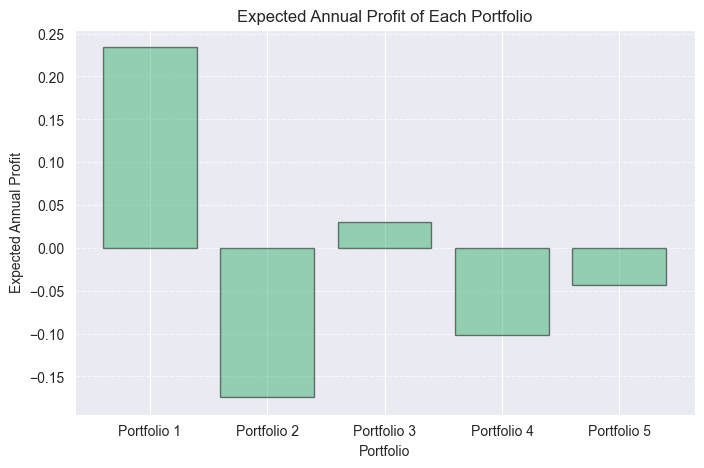

In [34]:
import matplotlib.pyplot as plt 

# Calculate expected annual profits for each portfolio
expected_profits = [np.sum(optimal_weights[i] * daily_log_returns[i].mean()) * 252 for i in range(5)]
portfolio_labels = [f'Portfolio {i+1}' for i in range(5)]

plt.figure(figsize=(8, 5))
plt.bar(portfolio_labels, expected_profits, color='mediumseagreen', edgecolor='black', alpha = .5)
plt.title('Expected Annual Profit of Each Portfolio')
plt.xlabel('Portfolio')
plt.ylabel('Expected Annual Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The results above clearly indicate that mixing high and low risk stocks cuts down the portfolio volatility. If one were looking for a profitable portfolio with relatively low volatility, Portfolio 3 would be the ideal choice. While profitable, Portfolio 1 has a much larger volatility, and is therefore more risky than Portfolio 3.